<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/Rain_Prediction_Analysis_In_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project On Rain Prediction in AUS**

In [87]:
#Import some libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [88]:
#Loading data set
df = pd.read_csv("/content/drive/MyDrive/All CSV files/weatherAUS (1).csv")

In [89]:
#dimensions of dataset
#There are 145460 rows and 23 columns
df.shape

(145460, 23)

In [90]:
#Preview dataset
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [91]:
#remove date predictor in dataset
df.drop("Date", axis = 1, inplace = True)

In [92]:
#preview dataset while dropping date
df.shape

(145460, 22)

In [93]:
#Checking the columns in dataset
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [94]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [95]:
#Checking null value count in data
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Dropping the null values in dependent variable

In [96]:
#Dropping the null values in dependent variable
#Use df1 veriable for train data
df1 = df[df['RainTomorrow'].notna()]   #This is our training data
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [97]:
#Dimension of dataset while dropping null values
df1.shape

(142193, 22)

In [98]:
#info of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

# Declare feature vector and target variable

In [99]:
# find categorical variables

categorical = [var for var in df1.columns if df1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [100]:
#Display categorical variables
df1[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [101]:
# find numerical variables

numerical = [var for var in df1.columns if df1[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [102]:
#Display nemerical variables
df1[numerical].head()     #Missing values in numerical variables

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [103]:
#checking null values in dataframe
df1.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

# Filling the null values

In [104]:
#replacing null values in categorical variables with mode value
df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0], inplace=True)
df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0], inplace=True)
df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0], inplace=True)
df1['RainToday'].fillna(df1['RainToday'].mode()[0], inplace=True)
df1['RainTomorrow'].fillna(df1['RainTomorrow'].mode()[0], inplace=True)

In [105]:
#Count of null values in dataset
df1.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

# Lablel Encoding

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [106]:
# view the categorical variables

df1[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [107]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df1['Location']= label_encoder.fit_transform(df1['Location'])
df1['WindGustDir']= label_encoder.fit_transform(df1['WindGustDir'])
df1['WindDir9am']= label_encoder.fit_transform(df1['WindDir9am'])
df1['WindDir3pm']= label_encoder.fit_transform(df1['WindDir3pm'])
df1['RainToday']= label_encoder.fit_transform(df1['RainToday'])
df1['RainTomorrow']= label_encoder.fit_transform(df1['RainTomorrow'])
 

In [108]:
#Display data variables
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,NaN,NaN,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0,0
145455,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0


In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [110]:
#There is not null record in our data
df1.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

In [111]:
#filling the null values in numerical variable with median
df1 = df1.fillna(df1.median())

# Model Building

Declare feature vector and target variable

# spliiting data into tarining and testing

In [112]:
X = df1.drop(['RainTomorrow'], axis=1)

y = df1['RainTomorrow']


# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# check the shape of X_train and X_test
print(X_train.shape, X_test.shape)

(113754, 21) (28439, 21)


# Model fitting

In [113]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Predict results

In [114]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [115]:
#**Check accuracy score**
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8434


In [116]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20882  1185]
 [ 3269  3103]]

True Positives(TP) =  20882

True Negatives(TN) =  3103

False Positives(FP) =  1185

False Negatives(FN) =  3269


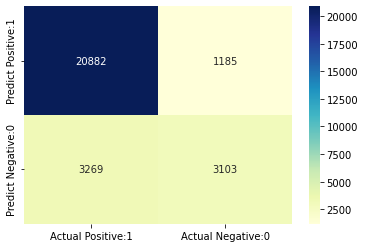

In [117]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [118]:
#import classification regression
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22067
           1       0.72      0.49      0.58      6372

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.74     28439
weighted avg       0.83      0.84      0.83     28439



# Adjusting the threshold level

In [119]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.91330562, 0.08669438],
       [0.92738994, 0.07261006],
       [0.86268225, 0.13731775],
       [0.98528964, 0.01471036],
       [0.93897672, 0.06102328],
       [0.96456567, 0.03543433],
       [0.17185812, 0.82814188],
       [0.17262925, 0.82737075],
       [0.84676467, 0.15323533],
       [0.91308382, 0.08691618]])

In [120]:
# store the probabilities in dataframe

y_pred_prob_data1 = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_data1

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.913306,0.086694
1,0.927390,0.072610
2,0.862682,0.137318
3,0.985290,0.014710
4,0.938977,0.061023
5,0.964566,0.035434
6,0.171858,0.828142
7,0.172629,0.827371
8,0.846765,0.153235
9,0.913084,0.086916


# Now Creating new dataset DF2

In [121]:
#Create new dataset and find null valuesdf2,isna().sum()
df2 = df[~df['RainTomorrow'].notna()]
df2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


In [122]:
df2.isna().sum()

Location            0
MinTemp           848
MaxTemp           939
Rainfall         1855
Evaporation      1947
Sunshine         2019
WindGustDir       996
WindGustSpeed     993
WindDir9am        553
WindDir3pm        450
WindSpeed9am      419
WindSpeed3pm      432
Humidity9am       880
Humidity3pm       897
Pressure9am      1051
Pressure3pm      1047
Cloud9am         2231
Cloud3pm         2264
Temp9am           863
Temp3pm           883
RainToday        1855
RainTomorrow     3267
dtype: int64

In [123]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df2['Location']= label_encoder.fit_transform(df2['Location'])
df2['WindGustDir']= label_encoder.fit_transform(df2['WindGustDir'])
df2['WindDir9am']= label_encoder.fit_transform(df2['WindDir9am'])
df2['WindDir3pm']= label_encoder.fit_transform(df2['WindDir3pm'])
df2['RainToday']= label_encoder.fit_transform(df2['RainToday'])
df2['RainTomorrow']= label_encoder.fit_transform(df2['RainTomorrow'])


In [124]:
#filling the null values in numerical variable
df2['MinTemp'] = df2['MinTemp'].fillna(df2['MinTemp'].median())
df2['MaxTemp'] = df2['MaxTemp'].fillna(df2['MaxTemp'].median())
df2['Rainfall'] = df2['Rainfall'].fillna(df2['Rainfall'].median())
df2['Evaporation'] = df2['Evaporation'].fillna(df2['Evaporation'].median())
df2['Sunshine'] = df2['Sunshine'].fillna(df2['Sunshine'].median())
df2['WindGustSpeed'] = df2['WindGustSpeed'].fillna(df2['WindGustSpeed'].median())
df2['WindSpeed9am'] = df2['WindSpeed9am'].fillna(df2['WindSpeed9am'].median())
df2['WindSpeed3pm'] = df2['WindSpeed3pm'].fillna(df2['WindSpeed3pm'].median())
df2['Humidity9am'] = df2['Humidity9am'].fillna(df2['Humidity9am'].median())
df2['Humidity3pm'] = df2['Humidity3pm'].fillna(df2['Humidity3pm'].median())
df2['Pressure9am'] = df2['Pressure9am'].fillna(df2['Pressure9am'].median())
df2['Pressure3pm'] = df2['Pressure3pm'].fillna(df2['Pressure3pm'].median())
df2['Cloud9am'] = df2['Cloud9am'].fillna(df2['Cloud9am'].median())
df2['Cloud3pm'] = df2['Cloud3pm'].fillna(df2['Cloud3pm'].median())
df2['Temp9am'] = df2['Temp9am'].fillna(df2['Temp9am'].median())
df2['Temp3pm'] = df2['Temp3pm'].fillna(df2['Temp3pm'].median())

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 14 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       3267 non-null   int64  
 1   MinTemp        3267 non-null   float64
 2   MaxTemp        3267 non-null   float64
 3   Rainfall       3267 non-null   float64
 4   Evaporation    3267 non-null   float64
 5   Sunshine       3267 non-null   float64
 6   WindGustDir    3267 non-null   int64  
 7   WindGustSpeed  3267 non-null   float64
 8   WindDir9am     3267 non-null   int64  
 9   WindDir3pm     3267 non-null   int64  
 10  WindSpeed9am   3267 non-null   float64
 11  WindSpeed3pm   3267 non-null   float64
 12  Humidity9am    3267 non-null   float64
 13  Humidity3pm    3267 non-null   float64
 14  Pressure9am    3267 non-null   float64
 15  Pressure3pm    3267 non-null   float64
 16  Cloud9am       3267 non-null   float64
 17  Cloud3pm       3267 non-null   float64
 18  Temp9

# Split the data in x and y

In [137]:
from sklearn.utils.validation import indexable
X = df2.drop(['RainTomorrow'], axis=1)
y = df2['RainTomorrow']

print(X.shape)
print(y.shape)

(3267, 21)
(3267,)


In [138]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
14,2,8.4,24.6,0.0,4.4,7.0,16,41.0,8,14,...,30.0,57.0,32.0,1009.7,1008.7,7.0,6.0,15.9,23.5,0
283,2,2.6,22.4,0.0,4.4,7.0,16,41.0,0,14,...,13.0,71.0,55.0,1017.8,1017.6,7.0,6.0,9.7,14.3,0
435,2,22.1,35.1,0.0,4.4,7.0,16,41.0,1,12,...,11.0,58.0,37.0,1020.9,1017.8,7.0,1.0,26.9,33.5,0
437,2,21.5,35.0,0.0,4.4,7.0,16,41.0,10,0,...,7.0,76.0,35.0,1015.8,1010.3,7.0,8.0,24.2,33.1,0
443,2,15.5,30.6,0.0,4.4,7.0,16,41.0,9,11,...,11.0,66.0,30.0,1015.9,1013.8,7.0,6.0,19.4,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,38,22.5,37.7,0.0,4.4,7.0,9,50.0,9,2,...,26.0,22.0,11.0,1012.6,1009.6,7.0,6.0,28.8,37.2,0
145091,38,12.3,19.1,0.0,4.4,7.0,16,41.0,16,16,...,19.0,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,0
145092,38,14.2,18.7,0.0,4.4,7.0,16,41.0,13,16,...,19.0,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,2
145335,38,13.5,22.4,0.0,4.4,7.0,16,41.0,1,12,...,7.0,23.0,11.0,1013.7,1008.4,7.0,6.0,25.2,34.4,0


In [139]:
X.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [140]:
print(y.isna().sum())
X.isna().sum()

0


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [141]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
14,2,8.4,24.6,0.0,4.4,7.0,16,41.0,8,14,...,30.0,57.0,32.0,1009.7,1008.7,7.0,6.0,15.9,23.5,0
283,2,2.6,22.4,0.0,4.4,7.0,16,41.0,0,14,...,13.0,71.0,55.0,1017.8,1017.6,7.0,6.0,9.7,14.3,0
435,2,22.1,35.1,0.0,4.4,7.0,16,41.0,1,12,...,11.0,58.0,37.0,1020.9,1017.8,7.0,1.0,26.9,33.5,0
437,2,21.5,35.0,0.0,4.4,7.0,16,41.0,10,0,...,7.0,76.0,35.0,1015.8,1010.3,7.0,8.0,24.2,33.1,0
443,2,15.5,30.6,0.0,4.4,7.0,16,41.0,9,11,...,11.0,66.0,30.0,1015.9,1013.8,7.0,6.0,19.4,30.0,0


# Now predict results on past traning model building

In [142]:
y_pred_df2 = logreg.predict(X)

y_pred_df2

array([0, 0, 0, ..., 1, 0, 0])

In [143]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y, y_pred_df2)))

Model accuracy score: 0.7221


In [144]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred_df2))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      3267
           1       0.00      0.00      0.00         0

    accuracy                           0.72      3267
   macro avg       0.50      0.36      0.42      3267
weighted avg       1.00      0.72      0.84      3267



In [145]:
df2['y_pred_df2'] = y_pred_df2

In [146]:
df2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,y_pred_df2
14,2,8.4,24.6,0.0,4.4,7.0,16,41.0,8,14,...,32.0,1009.7,1008.7,7.0,6.0,15.9,23.5,0,0,0
283,2,2.6,22.4,0.0,4.4,7.0,16,41.0,0,14,...,55.0,1017.8,1017.6,7.0,6.0,9.7,14.3,0,0,0
435,2,22.1,35.1,0.0,4.4,7.0,16,41.0,1,12,...,37.0,1020.9,1017.8,7.0,1.0,26.9,33.5,0,0,0
437,2,21.5,35.0,0.0,4.4,7.0,16,41.0,10,0,...,35.0,1015.8,1010.3,7.0,8.0,24.2,33.1,0,0,0
443,2,15.5,30.6,0.0,4.4,7.0,16,41.0,9,11,...,30.0,1015.9,1013.8,7.0,6.0,19.4,30.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,38,22.5,37.7,0.0,4.4,7.0,9,50.0,9,2,...,11.0,1012.6,1009.6,7.0,6.0,28.8,37.2,0,0,0
145091,38,12.3,19.1,0.0,4.4,7.0,16,41.0,16,16,...,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,0,0,0
145092,38,14.2,18.7,0.0,4.4,7.0,16,41.0,13,16,...,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,2,0,1
145335,38,13.5,22.4,0.0,4.4,7.0,16,41.0,1,12,...,11.0,1013.7,1008.4,7.0,6.0,25.2,34.4,0,0,0
